In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [4]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


<Axes: xlabel='sex', ylabel='age'>

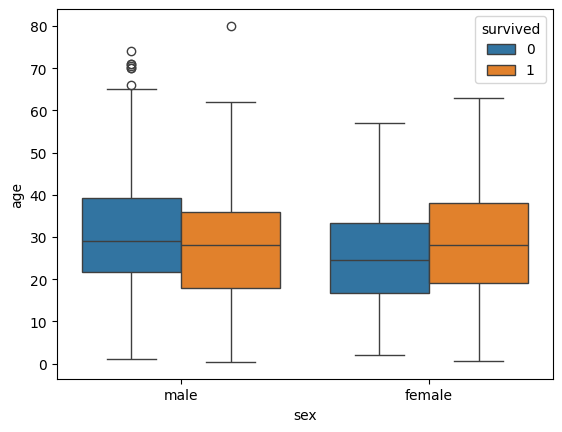

In [5]:
sns.boxplot(x='sex',y='age',hue='survived',data=df)

In [6]:
df['age']=df['age'].fillna(df['age'].mean())

<Axes: xlabel='sex', ylabel='age'>

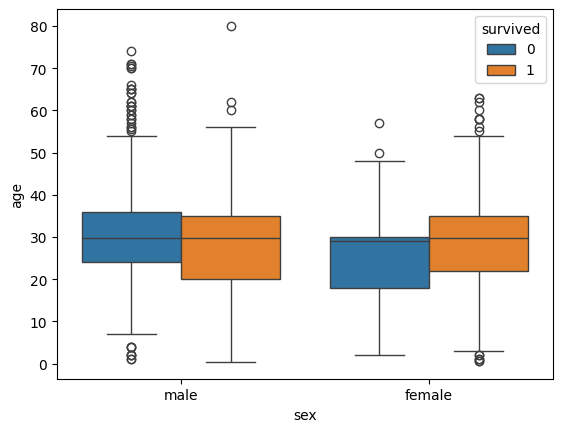

In [7]:
sns.boxplot(x='sex',y='age',hue='survived',data=df)

In [9]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3=Q1
outliers=df[
    (df['age']<(Q1-1.5*IQR))|
    (df['age']>(Q3+1.5*IQR))
]
print(outliers)

     survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
11          1       1  female  58.0      0      0   26.5500        S   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
54          0       1    male  65.0      0      1   61.9792        C   First   
94          0       3    male  59.0      0      0    7.2500        S   Third   
96          0       1    male  71.0      0      0   34.6542        C   First   
116         0       3    male  70.5      0      0    7.7500        Q   Third   
152         0       3    male  55.5      0      0    8.0500        S   Third   
170         0       1    male  61.0      0      0   33.5000        S   First   
174         0       1    male  56.0      0      0   30.6958        C   First   
195         1       1  female  58.0      0      0  146.5208        C   First   
232         0       2    male  59.0      0      0   13.5000        S  Second   
252         0       1    male  62.0     

In [13]:
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3=Q1
outliers=df[
    -((df['age']<(Q1-1.5*IQR))|
    (df['age']>(Q3+1.5*IQR)))
]
print(outliers)

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man     

<Axes: xlabel='sex', ylabel='age'>

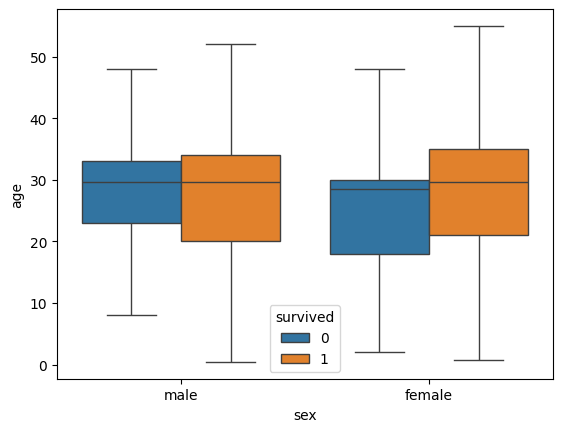

In [14]:
sns.boxplot(x='sex',y='age',hue='survived',data=outliers,showfliers=False)